# Allen fMOST ingest demo 

In this notebook we will showcase transforming neuronal reconstructions from [Sorensen et al.](https://www.biorxiv.org/content/10.1101/2023.11.25.568393v1)
from Allen CCF space to the co-registered uCT.

To run this code you will need to install/download the following packages and data:
- the fMOST reconstructions (in our case kindly provided by S. Sorensen directly)
- the Allen CCF template downloaded from [here](https://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/average_template/)
- the test uCT dataset (available upon request)
- the following Python packages:
  - [navis](https://github.com/navis-org/navis)
  - [navis-mousebrains](https://github.com/navis-org/navis-mousebrains/tree/main/mousebrains/data)
  - [octarine](https://github.com/schlegelp/octarine) for visualising the 3d volumes + neurons
  - [nnrd](https://pypi.org/project/pynrrd/) to load the image volumes

In [1]:
import cmap
import nrrd
import navis
import mousebrains

import octarine as oc
import matplotlib.pyplot as plt

In [2]:
# Load the HPF fMOST dataset (adjust file path as needed)
neurons = navis.read_swc("UM1_DATA_swcFiles/")

# Show a quick summary of the loaded neurons
neurons

Importing:   0%|          | 0/110 [00:00<?, ?it/s]

,type,name,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units,created_at,origin,file
0,navis.TreeNeuron,18469_6731-X8443-Y39338_reg,65872,None,231,239,77686.390625,None,1 dimensionless,2024-06-11 13:03:20.579483,UM1_DATA_swcFiles/18469_6731-X8443-Y39338_reg.swc,18469_6731-X8443-Y39338_reg.swc
1,navis.TreeNeuron,18457_6269-X26956-Y8702_reg,25407,None,130,138,34936.582031,None,1 dimensionless,2024-06-11 13:03:20.592135,UM1_DATA_swcFiles/18457_6269-X26956-Y8702_reg.swc,18457_6269-X26956-Y8702_reg.swc
...,...,...,...,...,...,...,...,...,...,...,...,...
108,navis.TreeNeuron,18465_6342-X5487-Y11501_reg,17414,None,143,149,34682.078125,None,1 dimensionless,2024-06-11 13:03:22.061488,UM1_DATA_swcFiles/18465_6342-X5487-Y11501_reg.swc,18465_6342-X5487-Y11501_reg.swc
109,navis.TreeNeuron,17781_6802-X8324-Y14113_reg,48848,None,174,179,60230.136719,None,1 dimensionless,2024-06-11 13:03:22.083443,UM1_DATA_swcFiles/17781_6802-X8324-Y14113_reg.swc,17781_6802-X8324-Y14113_reg.swc


In [3]:
# Load the Allen CCF and uCT volumes
ccf, _ = nrrd.read("/Users/philipps/Downloads/average_template_25.nrrd")
uct, _ = nrrd.read("/Users/philipps/Downloads/microCT_coronal.nrrd")

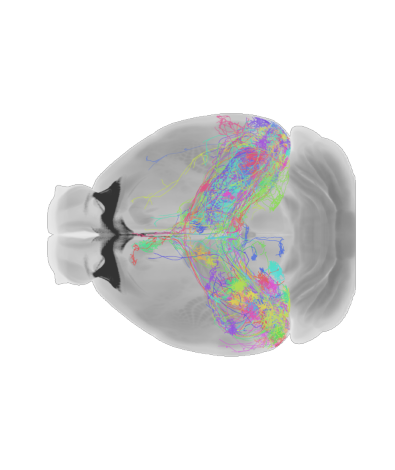

In [25]:
# Start a new viewer (N.B. we're using the static, offscreen mode here)
v = oc.Viewer(offscreen=True)
v.add_volume(ccf, color=cmap.Colormap("Greys"), spacing=25, clim=(20, 'data'), opacity=.8)
v.add_neuron(neurons)

# When co-visualising volumes and neurons, it's useful to adjust the blend mode
# to make the neurons more visible
v.blend_mode = 'weighted_depth'

# Set top view
v.set_view('XZ')

# Render image to matplotlib figure
_ = plt.imshow(v._screenshot(size=(1920, 1080)))

# Adjust the aspect ratio and remove axes
ax = plt.gca()
ax.set_aspect('equal')
ax.set_xlim(1000, 2800)
ax.set_axis_off()
plt.tight_layout()
# plt.savefig("neurons_in_CCF.png", dpi=500, transparent=True)

v.close() # Close the viewer

In [7]:
# Transform the neurons
neurons_xf = navis.xform_brain(neurons, source='AllenCCF', target='uCT_test')

Transform path: AllenCCF -> AllenCCF_coronal -> uCT_test


Xforming:   0%|          | 0/110 [00:00<?, ?it/s]

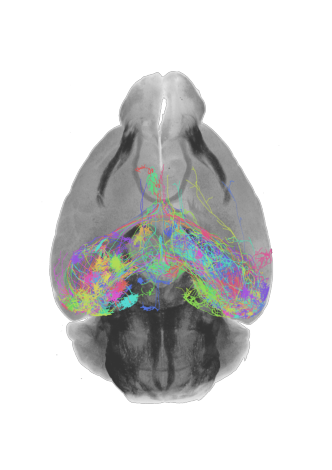

In [22]:
# Render the transformed neurons in the CCF template
v = oc.Viewer(offscreen=True)
v.add_volume(uct, color=cmap.Colormap("Greys"), spacing=14.6, clim=(10, 'data'), opacity=.8)
v.add_neuron(neurons_xf)

# When co-visualising volumes and neurons, it's useful to adjust the blend mode
# to make the neurons more visible
v.blend_mode = 'weighted_depth'

# Set top view
v.set_view('XZ')

# Render image to matplotlib figure
_ = plt.imshow(v._screenshot(size=(1920, 1080)))

# Adjust the aspect ratio and remove axes
ax = plt.gca()
ax.set_aspect('equal')
ax.set_xlim(1200, 2700)
ax.set_axis_off()
plt.tight_layout()
# plt.savefig("neurons_in_uCT.png", dpi=500, transparent=True)

v.close() # Close the viewer